In [3]:
import numpy as np

In [32]:
import matplotlib.pyplot as plt

In [4]:
# Lagrange

In [5]:
def calc_basis_poly(nodes, k, x):
    res = 1
    for i in range(len(nodes)):
        if(i!=k):
            res*=(x-nodes[i])/(nodes[k]-nodes[i])
    return res

def lagrange_poly(nodes, values, x):
    res = 0
    for i in range(len(nodes)):
        res += values[i] * calc_basis_poly(nodes, i, x)
    return res

In [6]:
# Divided Differences - Normal Formula

In [7]:
def divided_difference(nodes, values):
    if len(nodes) == 1:
        return values[0]
    return (divided_difference(nodes[1::], values[1::]) - divided_difference(nodes[0:-1:], values[0:-1:])) / (nodes[-1] - nodes[0])

In [8]:
# Newton

In [9]:
def newton_poly(nodes, values, x):
    res = 0
    multiplier = 1
    n = len(nodes)
    
    for k in range(0, n):
        current = divided_difference(nodes[0:k+1], values[0:k+1])*multiplier
        res+=current
        multiplier *= (x-nodes[k])
        
    return res   

In [10]:
# Divided Difference - Extended Formula

In [11]:
def divided_difference_extended(nodes, values, l, r):
    if nodes[l] == nodes[r]:
        return values[np.argmax(nodes == nodes[l]) + r - l] / math.factorial(r-l)
    return (divided_difference_extended(nodes, values, l+1, r) - divided_difference_extended(nodes, values, l, r - 1)) / (nodes[r] - nodes[l])

In [12]:
# Hermite

In [13]:
def hermite_poly(nodes, values, x):
    res = 0
    multiplier = 1
    
    for i in range(len(nodes)):
        res += divided_diff_extended(nodes, values, 0, i) *  multiplier
        multiplier *= (x - nodes[i])
        
    return res

In [14]:
# Newton Forward

In [15]:
def binom(n, k):
    if k == 0 or k == n:
        return 1
    return np.prod([(n + 1 - i) / i for i in range(1, k + 1)])

def finite_diff(values, k, i):
    
    if k == 0:
        return values[i]

    return finite_diff(values, k-1, i+1) - finite_diff(values, k-1, i)

def newton_forward(x, values, beg, end):
    n = len(values)
    nodes = np.linspace(beg, end, n)
    t = (x - nodes[0]) / (nodes[1] - nodes[0])

    sum = 0
    for i in range(0, n):
        sum += finite_diff(values, i, 0) * binom(t, i)
    return sum

In [16]:
# Exponential Basis Interpolation

In [41]:
def create_matrix_exp(nodes):
    matrix = []
    
    for node in nodes:
        current_row = []

        for i in range(len(nodes)):
            current_row.append(np.e ** (i*node))
        matrix.append(current_row)

    return np.array(matrix)

In [18]:
def calc_exponential_poly(poly_coeffs, x):
    res = 0
    for i in range(len(poly_coeffs)):
        res += poly_coeffs[i] * np.exp(i * x)
    return res

In [19]:
# Trigonometric Basis Poly - 1st Way

In [33]:
def create_matrix_trig1(nodes):
    matrix = []
    for node in nodes:
        row = [1]
        mult = 1
        for i in range(1, len(nodes)):
            if i % 2 == 1:
                row.append(np.cos(mult*node))
            else:
                row.append(np.sin(mult*node))
                mult += 1
        matrix.append(row)
    return np.array(matrix)

In [34]:
def calc_trig_poly1(coeffs, x):
    res = coeffs[0]
    mult = 1
    for i in range(1, len(coeffs)):
        if i % 2 == 1:
            res += coeffs[i]*np.cos(mult*x)
        else:
            res += coeffs[i]*np.sin(mult*x)
            mult += 1
    return res

In [22]:
# Trigonometric Basis Poly - 2nd Way (Maybe the better one)

In [35]:
def create_matrix_trig2(nodes):
    matrix = []

    for node in nodes:
        row = []
        for i in range(0,len(nodes)):
            if i == 0: 
                row.append(1)
            elif i % 2 == 1:
                row.append(np.cos((i // 2 + 1) * node))
            else:
                row.append(np.sin((i // 2) * node))
        matrix.append(row)

    return np.array(matrix)

In [24]:
# Another Basis:

In [39]:
def basis(n, x): #demo basis lets make it exp basis
    return (np.e)**(n*x)

In [25]:
def create_matrix(nodes, basis):
    matrix = []

    for node in nodes:
        row = []
        for i in range(len(nodes)):
            row.append(basis(i, node))
        matrix.append(row)
    return np.array(matrix)

In [26]:
def calc_poly(coeffs, x, basis):
    res = 0
    for i, coeff in enumerate(coeffs):
        res += coeff * basis(i, x)
    return res

In [27]:
# Lagrange Analogue for Trig Basis

In [36]:
def calc_trig_basis_func(nodes, k, x):
    res = 1
    for idx, node in enumerate(nodes):
        if idx != k:
            res *= np.sin((x-node)/2) / np.sin((nodes[k]-node)/2)
    return res
    
def calc_trig_poly(nodes, values, x):
    res = 0
    for i in range(len(values)):
        res = values[i] * calc_basis_func(nodes, i, x)
    return res

In [29]:
# Chebyshev Nodes - 2 Ways

In [30]:
n = 4 # degree of poly is 4 but we need n+1 nodes!!!!!
chebyshev_nodes = np.empty(n+1)
for k in range(n+1):
    chebyshev_nodes[k] = np.cos((2 * (k + 1) - 1) / (2 * (n+1)) * np.pi)

nodes = np.array([np.cos(((2*k - 1) * np.pi) / (2 * (n + 1))) for k in range(1, n + 2)])

In [31]:
# for graphing: 

In [38]:
nodes = np.array([1,2,3,4,5])

In [40]:
values = np.array([3, 128, 115, 1050, 13500])

In [42]:
A = create_matrix_exp(nodes)

In [45]:
coeffs = np.linalg.solve(A, values)

In [46]:
x_axis = np.linspace(min(nodes), max(nodes), 1000)

In [47]:
y_axis = calc_exponential_poly(coeffs, x_axis)

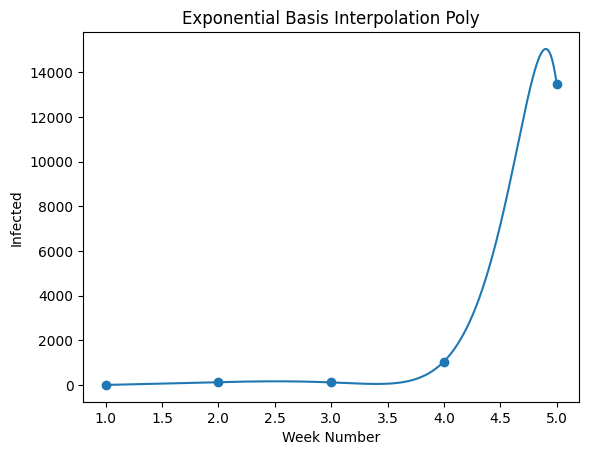

In [55]:
plt.title("Exponential Basis Interpolation Poly")
plt.scatter(nodes, values)
plt.plot(x_axis, y_axis)
plt.xlabel("Week Number")
plt.ylabel("Infected")
plt.show()